# **Project 1 - Salary Prediction**
## **Contents**
* [Introduction](#Introduction)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Feature Engineering](#Feature-Engineering)
* [Data Preprocessing](#Data-Preprocessing)
* [Machine Learning Model Development](#Machine-Learning-Model-Development)
* [Model Evaluation](#Model-Evaluation)
* [Machine Learning Pipelines and Model Deployment](#Machine-Learning-Pipelines-and-Model-Deployment)
* [Recommendation](#Recommendation)
* [Conclusion](#Conclusion)

## **Introduction**
The purpose of this project is to predict the salaries of data professionals from a given dataset. The approach taken in this project is to analyse the dataset and prepare it for the implementation of several machine learning models in order to predict the response variable (i.e. the salary of a data professional) from one or several carefully chosen explanatory variables. Next, each of the machine learning models implemented will be evaluated using a set of chosen metrics, and deployed. Finally the best performing machine learning model is chosen as a recommendation for predicting the salaries of data professionals.

In order to begin this project, the following Python libraries are imported, with the following justifications:
* `os`, for file handling;
* `sys`, for system handling;
* `numpy`, for numerical calculations;
* `scipy`, for scientific computing;
* `sympy`, for symbolic mathematics;
* `pandas`, for data analysis;
* `matplotlib`, for data visualisation;
* `matplotlib.pyplot`, for data visualisation;
* `seaborn`, for data visualisation;
* `warnings`, for warning handling;
* `sklearn`, for machine learning;
* `sklearn.preprocessing`, for preprocessing the dataset;
* `sklearn.linear_model`, for implementing regression models, and;
* `sklearn.metrics`, for model evaluation.

Moreover, the dataset in question is contained in the `salaries.csv` file, located in the current directory. The Python code used to import all of the above packages, as well as the dataset, is given in the code cell below. The first few rows of the dataset are also shown.

In [128]:
import os
import sys
import numpy as np
import scipy as sp
import sympy as smp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

np.random.seed(42)
palette = sns.color_palette("viridis_r", as_cmap=True)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})
wrn.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("salaries.csv")
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5/18/2014,1/7/2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7/28/2014,1/7/2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,4/3/2013,1/7/2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11/20/2014,1/7/2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


## **Exploratory Data Analysis**
In order to better understand the dataset, several of its variables are analysed, and some key metrics are extracted. The following methods of exploratory data analysis are employed, with the following justifications:
* A boxplot and histogram plot of the `SALARY` column of the dataset are shown. This is done to get a better sense of the general distribution of the salaries in the dataset, as well as to notice if there are any outliers. Moreover, several key metrics, such as the mean, median, and the first and third quartiles, are also shown. This analysis is repeated twice to show all of the same metrics when the dataset is separated by the `SEX` column, so as to determine if there is any significant difference in salary distribution across genders.
* A heatmap of the dataset's correlation matrix is generated. This is done to understand if there exists any pair of distinct variables with a strong linear relationship. This analysis is again repeated to check for any significant differences accross genders.
* A linear regression plot will, plotting the `SALARY` column against another column, such as `AGE` and `PAST EXP`, will be generated. This is to check if there is a strong linear relationship between those variables.

The Python code to implement all of this is given in the code cell below:

count      2639.000000
mean      58136.678287
std       36876.956944
min       40001.000000
25%       43418.000000
50%       46781.000000
75%       51401.500000
max      388112.000000
Name: SALARY, dtype: float64


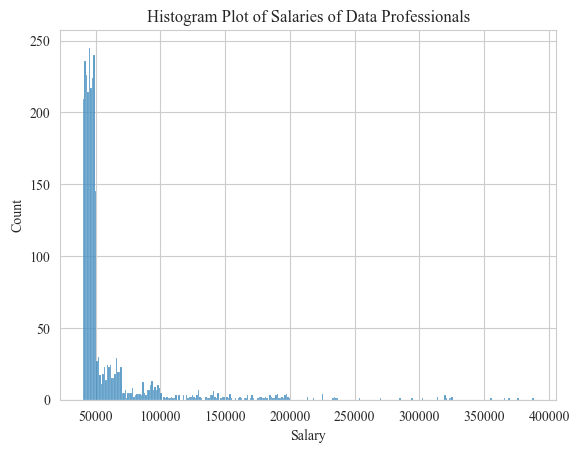

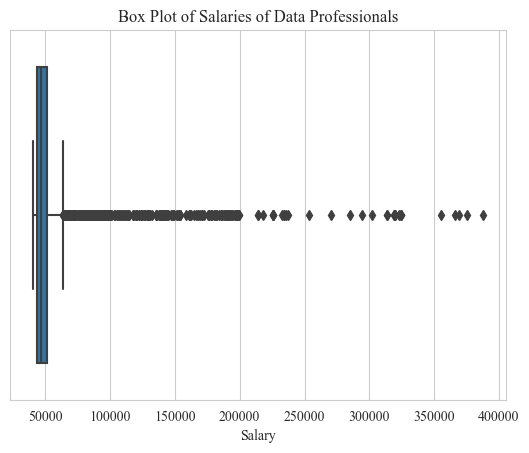

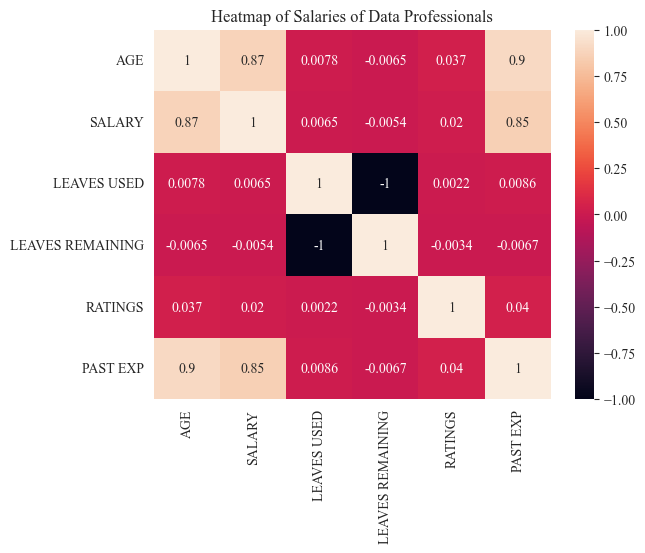

In [129]:
print(df["SALARY"].describe())
df_numerical_variables = df[["AGE", "SALARY", "LEAVES USED", "LEAVES REMAINING", "RATINGS", "PAST EXP"]]
correlation_matrix = df_numerical_variables.corr()
sns.histplot(data = df, x = "SALARY").set(xlabel = "Salary", ylabel = "Count", title = "Histogram Plot of Salaries of Data Professionals")
plt.show()
sns.boxplot(data = df, x = "SALARY").set(xlabel = "Salary", title = "Box Plot of Salaries of Data Professionals")
plt.show()
sns.heatmap(correlation_matrix, annot=True).set(title = "Heatmap of Salaries of Data Professionals")
plt.show()

count      1295.000000
mean      57092.555212
std       33051.194112
min       40001.000000
25%       43329.000000
50%       46791.000000
75%       51640.500000
max      388112.000000
Name: SALARY, dtype: float64


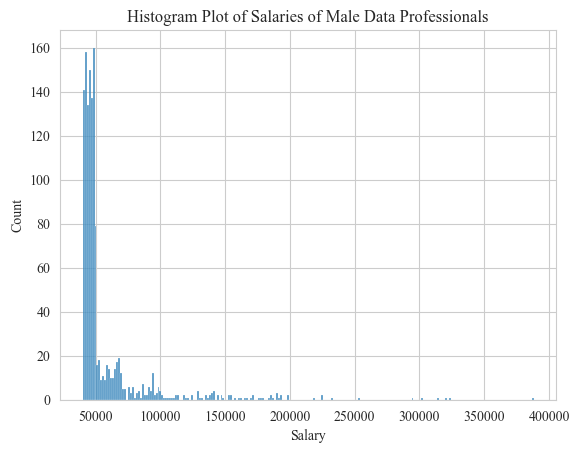

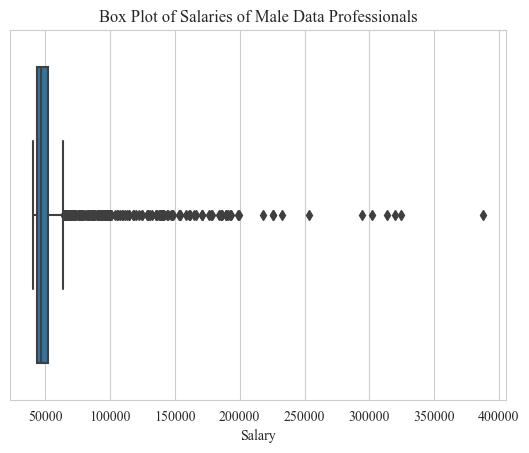

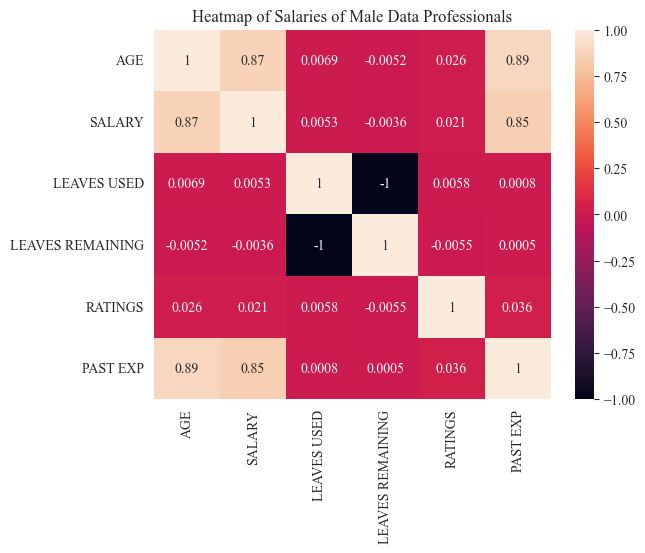

In [130]:
male_df = df[df["SEX"] == "M"]
df_numerical_variables = male_df[["AGE", "SALARY", "LEAVES USED", "LEAVES REMAINING", "RATINGS", "PAST EXP"]]
correlation_matrix = df_numerical_variables.corr()
print(male_df["SALARY"].describe())
sns.histplot(male_df, x = "SALARY").set(xlabel = "Salary", ylabel = "Count", title = "Histogram Plot of Salaries of Male Data Professionals")
plt.show()
sns.boxplot(data = male_df, x = "SALARY").set(xlabel = "Salary", title = "Box Plot of Salaries of Male Data Professionals")
plt.show()
sns.heatmap(correlation_matrix, annot=True).set(title = "Heatmap of Salaries of Male Data Professionals")
plt.show()

count      1344.000000
mean      59142.734375
std       40207.288247
min       40013.000000
25%       43494.500000
50%       46774.000000
75%       50813.000000
max      375647.000000
Name: SALARY, dtype: float64


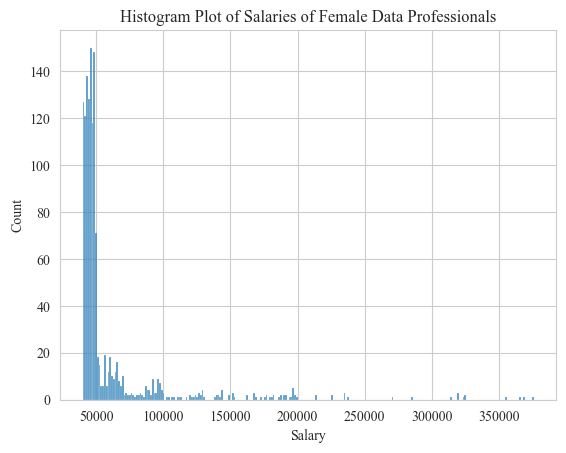

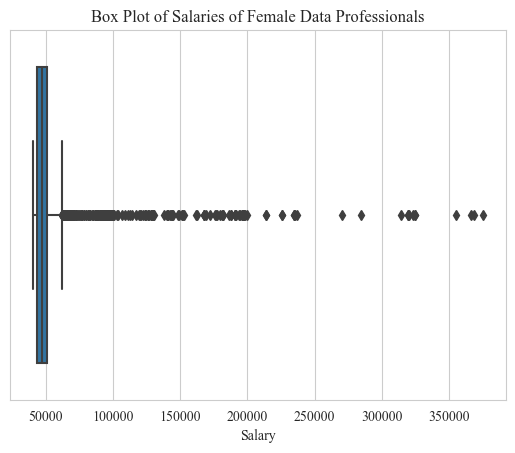

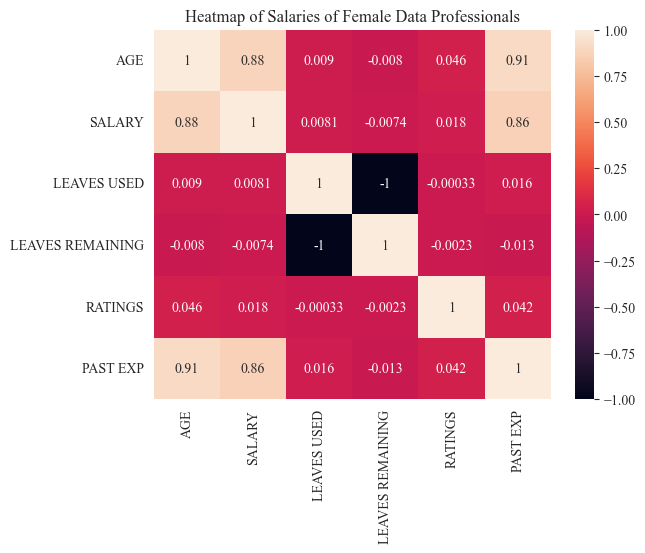

In [131]:
female_df = df[df["SEX"] == "F"]
df_numerical_variables = female_df[["AGE", "SALARY", "LEAVES USED", "LEAVES REMAINING", "RATINGS", "PAST EXP"]]
correlation_matrix = df_numerical_variables.corr()
print(female_df["SALARY"].describe())
sns.histplot(female_df, x = "SALARY").set(xlabel = "Salary", ylabel = "Count", title = "Histogram Plot of Salaries of Female Data Professionals")
plt.show()
sns.boxplot(data = female_df, x = "SALARY").set(xlabel = "Salary", title = "Box Plot of Salaries of Female Data Professionals")
plt.show()
sns.heatmap(correlation_matrix, annot=True).set(title = "Heatmap of Salaries of Female Data Professionals")
plt.show()

Based on the above plots and metrics, it appears that there is no significant difference in salary accross genders. Thus, gender is a not a strong predictor of salary, according to this dataset. The linear regression plots, plotting the `SALARY` column against the `PAST EXP` and the `SALARY` column against the `AGE` column, are shown in the code cell below:

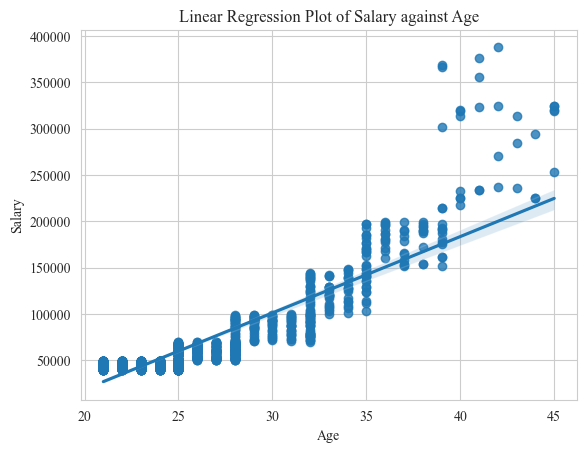

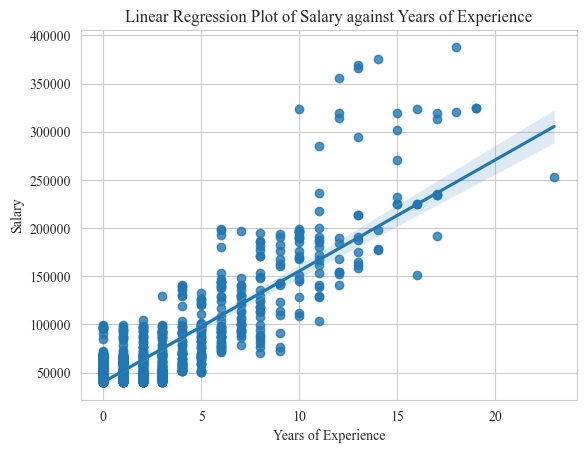

In [132]:
sns.regplot(data = df, x = "AGE", y = "SALARY").set(xlabel = "Age", ylabel = "Salary", title = "Linear Regression Plot of Salary against Age")
plt.show()
sns.regplot(data = df, x = "PAST EXP", y = "SALARY").set(xlabel = "Years of Experience", ylabel = "Salary", title = "Linear Regression Plot of Salary against Years of Experience")
plt.show()

There is evidently a strong linear relationship between those variables. Thus, they are likely strong predictors of salary.

## **Feature Engineering**
## **Data Preprocessing**
## **Machine Learning Model Development**
## **Model Evaluation**
## **Machine Learning Pipelines and Model Deployment**
## **Recommendation**
## **Conclusion**